# NonLinear Models

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv("../data/scores_synth.csv")
print(data.shape)
data

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1
...,...,...,...
995,8.801915,464.993872,0
996,15.317348,641.288260,1
997,25.411924,641.858088,1
998,4.898013,447.408180,0


In [7]:
data.describe()

,income,score,internet_connection
count,1000.000000,1000.000000,1000.000000
mean,25.132120,609.472997,0.691000
std,17.217098,82.097653,0.462312
min,0.893344,294.585973,0.000000
25%,13.581826,553.830647,0.000000
50%,19.073273,612.714370,1.000000
75%,34.970305,668.431175,1.000000
max,77.006947,845.859379,1.000000


# Nonlinear Models

## Tree

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['income']], data['score'], test_size=0.4, shuffle=True)

In [39]:
from sklearn.tree import DecisionTreeRegressor
cart = DecisionTreeRegressor()
cart.fit(X_train[['income']], y_train)

DecisionTreeRegressor()

In [42]:
from sklearn.metrics import mean_squared_error
losses = {}
losses['Tree'] = mean_squared_error(y_test, cart.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Tree  :  6827.583836470914


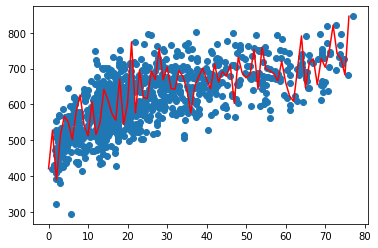

In [43]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)

plt.scatter(data['income'], data['score'])
plt.plot(cart.predict(x_range), color='r')

In [47]:
cart = DecisionTreeRegressor(... go to town!,min_samples_split=5,max_depth=2)
cart.fit(X_train[['income']], y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=5)

In [48]:
losses['Tree: max2'] = mean_squared_error(y_test, cart.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Tree  :  6827.583836470914
Tree: max2  :  3871.0685715688883


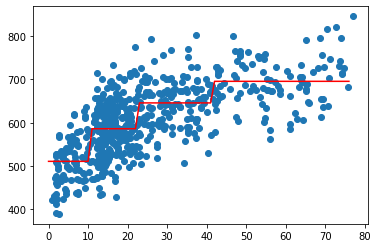

In [49]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart.predict(x_range), color='r')

## Random Forest
Pleas read about [hypterparameters](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(hyperparameter specifications)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
losses['Random Forest'] = mean_squared_error(y_test, rf.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Tree  :  6804.365307760732
Random Forest  :  4718.800489774943


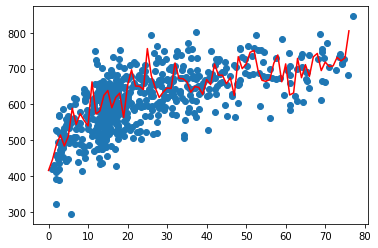

In [22]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [24]:
losses['Random Forest: max2'] = mean_squared_error(y_test, rf.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Tree  :  6804.365307760732
Random Forest  :  4718.800489774943
Random Forest: max2  :  3246.265811312677


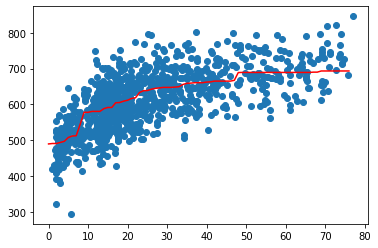

In [25]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)


plt.scatter(data['income'], data['score'])
plt.plot(rf.predict(x_range), color='r')

## XGBoost

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

[Further reading](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
losses['XGBoost'] = mean_squared_error(y_test, xgb.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Tree  :  6804.365307760732
Random Forest  :  4718.800489774943
Random Forest: max2  :  3246.265811312677
XGBoost  :  4868.409121591366


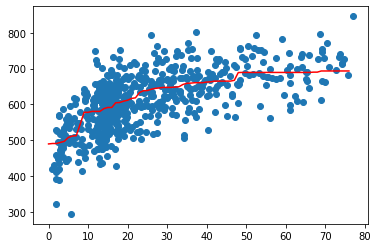

In [32]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

Let's play around with some [parameters](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) to improve the results.

In [33]:
xgb = XGBRegressor(max_depth=2)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
losses['XGBoost: max2'] = mean_squared_error(y_test, xgb.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Tree  :  6804.365307760732
Random Forest  :  4718.800489774943
Random Forest: max2  :  3246.265811312677
XGBoost  :  4868.409121591366
XGBoost: max2  :  3515.2595686623454


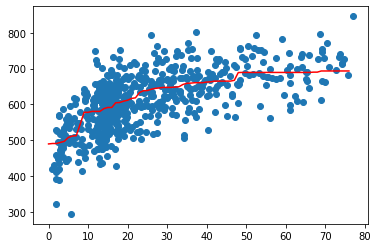

In [35]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')